In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [23]:
import pandas as pd

df_crime_police = pd.read_csv("crime_in_Seoul.csv", thousands=",", encoding = "euc-kr") # 2,123 쉼표제거하고 한번에 가져오기!
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [4]:
df_crime_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [5]:
df_crime_police.describe()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.258065,4.935484,8.903226,8.161290,175.774194,131.967742,1784.096774,694.645161,2103.419355,1779.419355
std,3.605253,3.203493,4.935280,5.710206,85.580259,56.590037,699.948825,276.919429,829.042330,681.461164
min,1.000000,0.000000,1.000000,1.000000,59.000000,46.000000,653.000000,186.000000,547.000000,491.000000
25%,3.000000,2.500000,6.000000,4.000000,103.500000,90.000000,1133.500000,450.500000,1408.000000,1219.000000
50%,4.000000,4.000000,8.000000,7.000000,154.000000,124.000000,1812.000000,672.000000,2054.000000,1711.000000
75%,7.500000,7.500000,13.000000,11.500000,251.000000,175.500000,2264.000000,858.500000,2717.500000,2338.500000
max,14.000000,12.000000,22.000000,26.000000,334.000000,247.000000,3239.000000,1277.000000,3572.000000,2961.000000


# 서울에구는 25갠데 경찰서수는 31개. 구별로 묶어줄거임
# 다음검색 쓸꺼니까 카카오API사용
## 혜화서 > 서울'혜화'경찰'서' 로바꿔서 검색할거


In [6]:
# 컴프리헨션 이용!

station_name = [f"서울{name[:-1]}경찰서" for name in df_crime_police["관서명"]]
print(station_name)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


In [7]:
KAKAO_API_KEY = "90f226e05d1cb0ee1fbaed30faceecbe"

In [11]:
import requests

KAKAO_LOCAL_URL = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}"

headers = {
    "Authorization" : f'KakaoAK {KAKAO_API_KEY}'
}
response = requests.get(KAKAO_LOCAL_URL.format("의왕지구대"), headers = headers) # format()부분 quert={}에 들어갈검색어
response

<Response [200]>

In [16]:
sample = response.json()
sample['documents'][0] # address_name

{'address_name': '경기 의왕시 오전동 839-8',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 행정기관 > 경찰서 > 지구대',
 'distance': '',
 'id': '10670602',
 'phone': '031-8086-0116',
 'place_name': '의왕지구대',
 'place_url': 'http://place.map.kakao.com/10670602',
 'road_address_name': '경기 의왕시 경수대로 352',
 'x': '126.968033912079',
 'y': '37.3569238714132'}

In [20]:
station_address_list = []

import requests

for name in station_name:
  KAKAO_LOCAL_URL = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}"

  headers = {
    "Authorization" : f'KakaoAK {KAKAO_API_KEY}'}

  response = requests.get(KAKAO_LOCAL_URL.format(name), headers = headers)
  
  sample = response.json()
  address = sample['documents'][0]['address_name']

  station_address_list.append(address)

station_address_list

['서울 중구 저동2가 62-1',
 '서울 종로구 공평동 1',
 '서울 중구 남대문로5가 561',
 '서울 서대문구 미근동 165',
 '서울 종로구 인의동 48-57',
 '서울 용산구 원효로1가 12-12',
 '서울 성북구 삼선동5가 301',
 '서울 동대문구 청량리동 229',
 '서울 마포구 아현동 618-1',
 '서울 영등포구 당산동3가 2-11',
 '서울 성동구 행당동 192-8',
 '서울 동작구 노량진동 72-35',
 '서울 광진구 구의동 254-32',
 '서울 은평구 녹번동 177-15',
 '서울 강북구 번동 415-15',
 '서울 금천구 시흥동 1030',
 '서울 중랑구 신내동 810',
 '서울 강남구 대치동 998',
 '서울 관악구 봉천동 1695-5',
 '서울 강서구 화곡동 980-27',
 '서울 강동구 성내동 541-1',
 '서울 성북구 하월곡동 27-5',
 '서울 구로구 구로동 436',
 '서울 서초구 서초동 1726-1',
 '서울 양천구 신정동 321',
 '서울 송파구 가락동 9',
 '서울 노원구 하계동 250',
 '서울 서초구 방배동 455-10',
 '서울 은평구 불광동 산 24',
 '서울 도봉구 창동 17',
 '서울 강남구 개포동 14']

In [21]:
# 컴프리헨션⭐⭐⭐ list, set, dict를 간단히 만들 수 있는 문법
gu_names = [address.split()[1] for address in station_address_list]
gu_names

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [24]:
# 이제 관서명 필요없서
df_crime_police['구별'] = gu_names
df_crime_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [28]:
# 구별 데이터 집계 합
crime = df_crime_police.groupby("구별").sum()
crime.head()

# import numpy as np

# crime = pd.pivot_table(
#     df_crime_police,
#     index = "구별",
#     aggfunc = np.sum)
# 피벗테이블로 하는 방법

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,
강남구,13,10,21,18,449,349,3850,1650,4284,3705
강동구,4,3,6,8,156,123,2366,789,2712,2248
강북구,7,8,14,13,153,126,1434,618,2649,2348
강서구,7,8,13,13,262,191,2096,1260,3207,2718
관악구,9,8,12,14,320,221,2706,827,3298,2642


In [31]:
# 발생대비 검거비율 한번 구해보자
# 특성 조합

crime["강간검거율"] = crime["강간 검거"] / crime["강간 발생"] * 100
crime["강도검거율"] = crime["강도 검거"] / crime["강도 발생"] * 100
crime["살인검거율"] = crime["살인 검거"] / crime["살인 발생"] * 100
crime["절도검거율"] = crime["절도 검거"] / crime["절도 발생"] * 100
crime["폭력검거율"] = crime["폭력 검거"] / crime["폭력 발생"] * 100


crime.head()

# 개꿀팁 알트+시프트 누르고 드래그⭐

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,13,10,21,18,449,349,3850,1650,4284,3705,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,4,3,6,8,156,123,2366,789,2712,2248,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,7,8,14,13,153,126,1434,618,2649,2348,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,7,8,13,13,262,191,2096,1260,3207,2718,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,9,8,12,14,320,221,2706,827,3298,2642,69.062500,116.666667,88.888889,30.561715,80.109157


In [32]:
del crime["강간 검거"]
del crime["강도 검거"]
del crime["살인 검거"]
del crime["절도 검거"]
del crime["폭력 검거"]

crime.head()

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,13,21,449,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,4,6,156,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,7,14,153,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,7,13,262,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,9,12,320,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [35]:
crime = crime.rename(
    columns={
        "강간 발생" : "강간",
        "강도 발생" : "강도",
        "살인 발생" : "살인",
        "절도 발생" : "절도",
        "폭력 발생" : "폭력"}
)

crime.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,13,21,449,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,4,6,156,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,7,14,153,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,7,13,262,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,9,12,320,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [37]:
con_list = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율"]
# 검거율 100넘어가는거 걍 100으로 통일시킬꺼

for column in con_list:
  crime.loc[crime[column]>100 , column] = 100

crime.head()


,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,13,21,449,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,4,6,156,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,7,14,153,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,7,13,262,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,9,12,320,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


# 정규화
단위통일화
별점 0~ 10 0~ 5를  0~1로 맞춰주기

In [41]:
# 파이썬의 대표적인 머신러닝 라이브러리인  Scikit-Learn의 MinMaxScaler사용
from sklearn.preprocessing import MinMaxScaler

col = ["강간", "강도","살인","절도","폭력"]
crime[col]


,강간,강도,살인,절도,폭력
구별,,,,,
강남구,449,21,13,3850,4284
강동구,156,6,4,2366,2712
강북구,153,14,7,1434,2649
강서구,262,13,7,2096,3207
관악구,320,12,9,2706,3298
광진구,240,14,4,3026,2625
구로구,281,15,8,2335,3007
금천구,151,6,3,1567,2054
노원구,197,7,10,2193,2723


In [44]:
x = crime[col].values
x
# 넘파이 배열형태로 가져와야!

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [45]:
scaler = MinMaxScaler()

scaled_x = scaler.fit_transform(x)

crime_norm = pd.DataFrame(scaled_x, columns=col, index = crime.index)
crime_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [46]:
crime_norm[con_list] = crime[con_list]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [47]:
pop_cctv = pd.read_csv("pop_cctv_result.csv", encoding="utf-8", index_col="구별")
pop_cctv.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,162.948104


In [48]:
crime_norm[["인구수","CCTV"]] = pop_cctv[["인구수", "소계"]]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [50]:
import numpy as np
col = ["강간","강도", "살인",'절도','폭력']
crime_norm['범죄'] = np.sum(crime_norm[col], axis=1) #축방향 졸라중요!!⭐⭐⭐ >이방향으로 더해야
crime_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.204979
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.603930
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.666924
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.905445


In [52]:
crime_norm["검거율"] = np.sum(crime_norm[con_list], axis=1)
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


# 시각화로보자

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

### pairplot을 이용해 범죄간의 상관관계를 확인

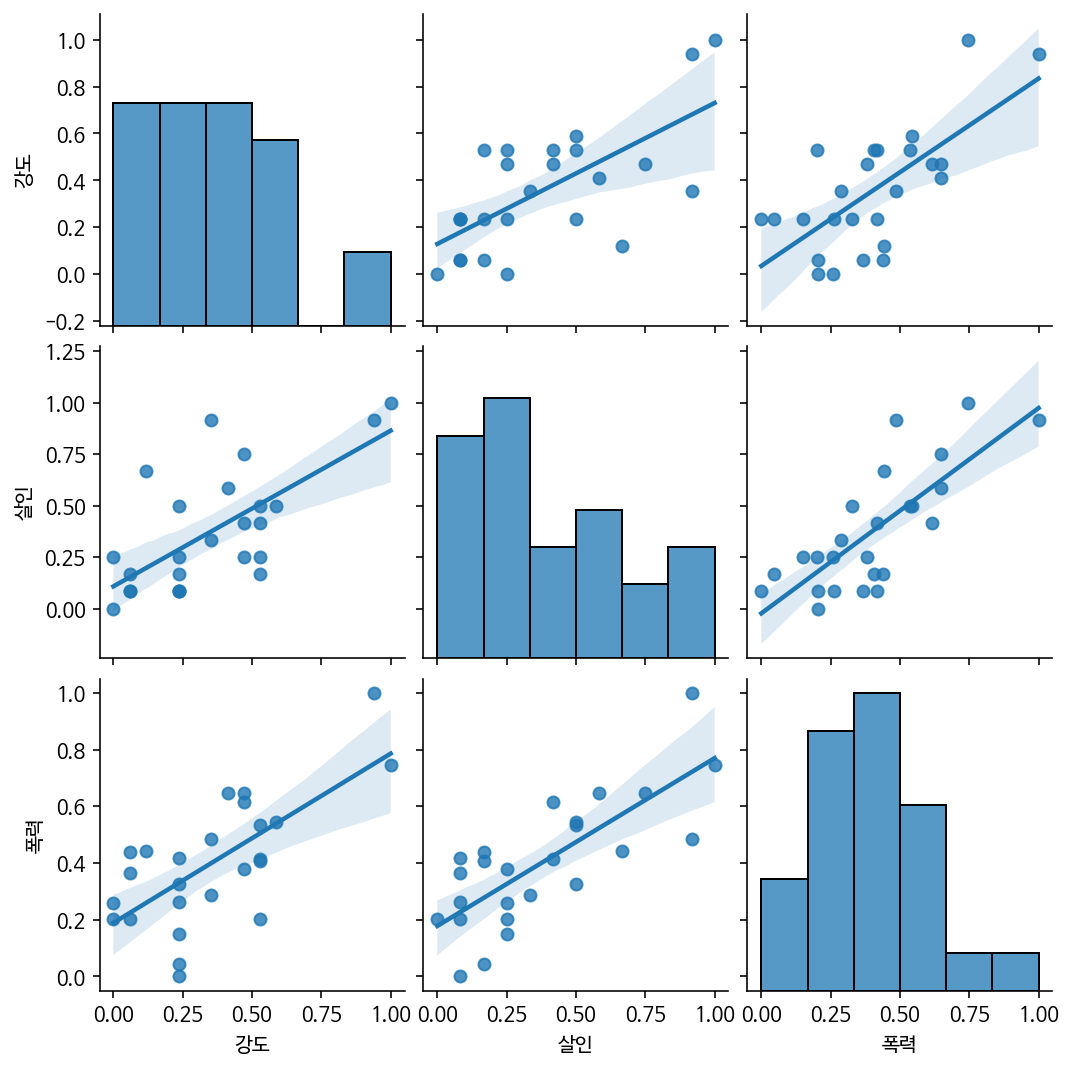

In [54]:
sns.pairplot(
    data=crime_norm,
    vars=["강도","살인",'폭력'], # 컬럼선택가능
    kind='reg'

)
plt.show()

## 인구수와 CCTV에 대한 범죄의 상관관계

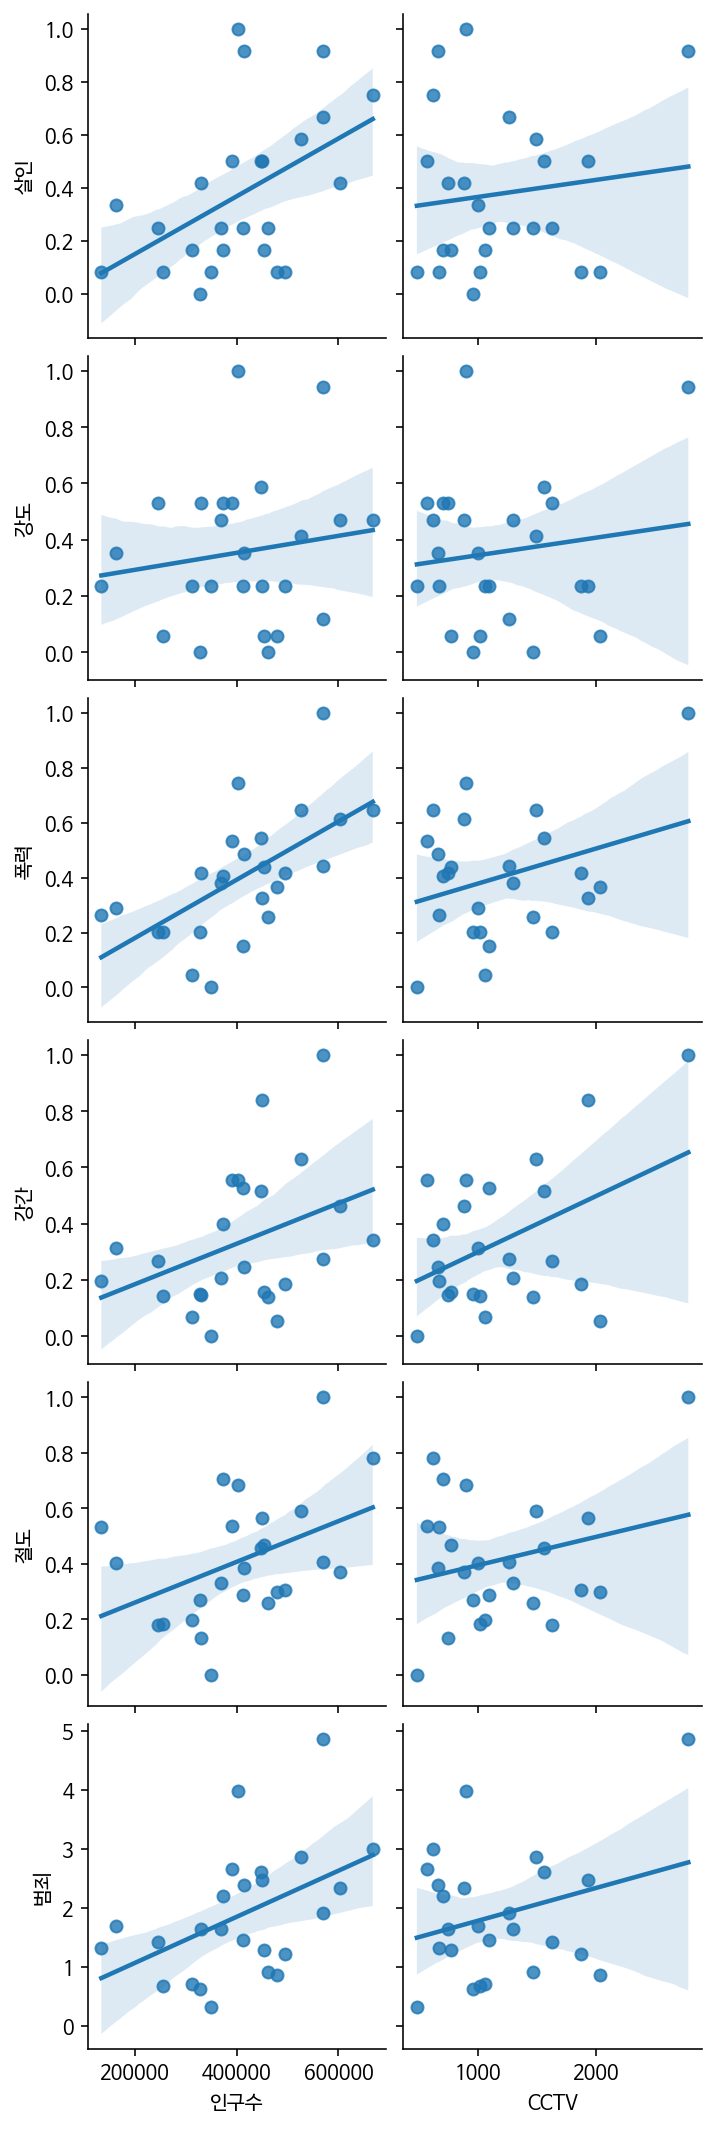

In [56]:
sns.pairplot(
    data=crime_norm,
    x_vars=["인구수","CCTV"],
    y_vars=["살인","강도","폭력","강간","절도","범죄"],
    kind = "reg"
)

plt.show()

# 예상했던 것처럼 인구수,cctv증가하면 범죄도 증가하는추세

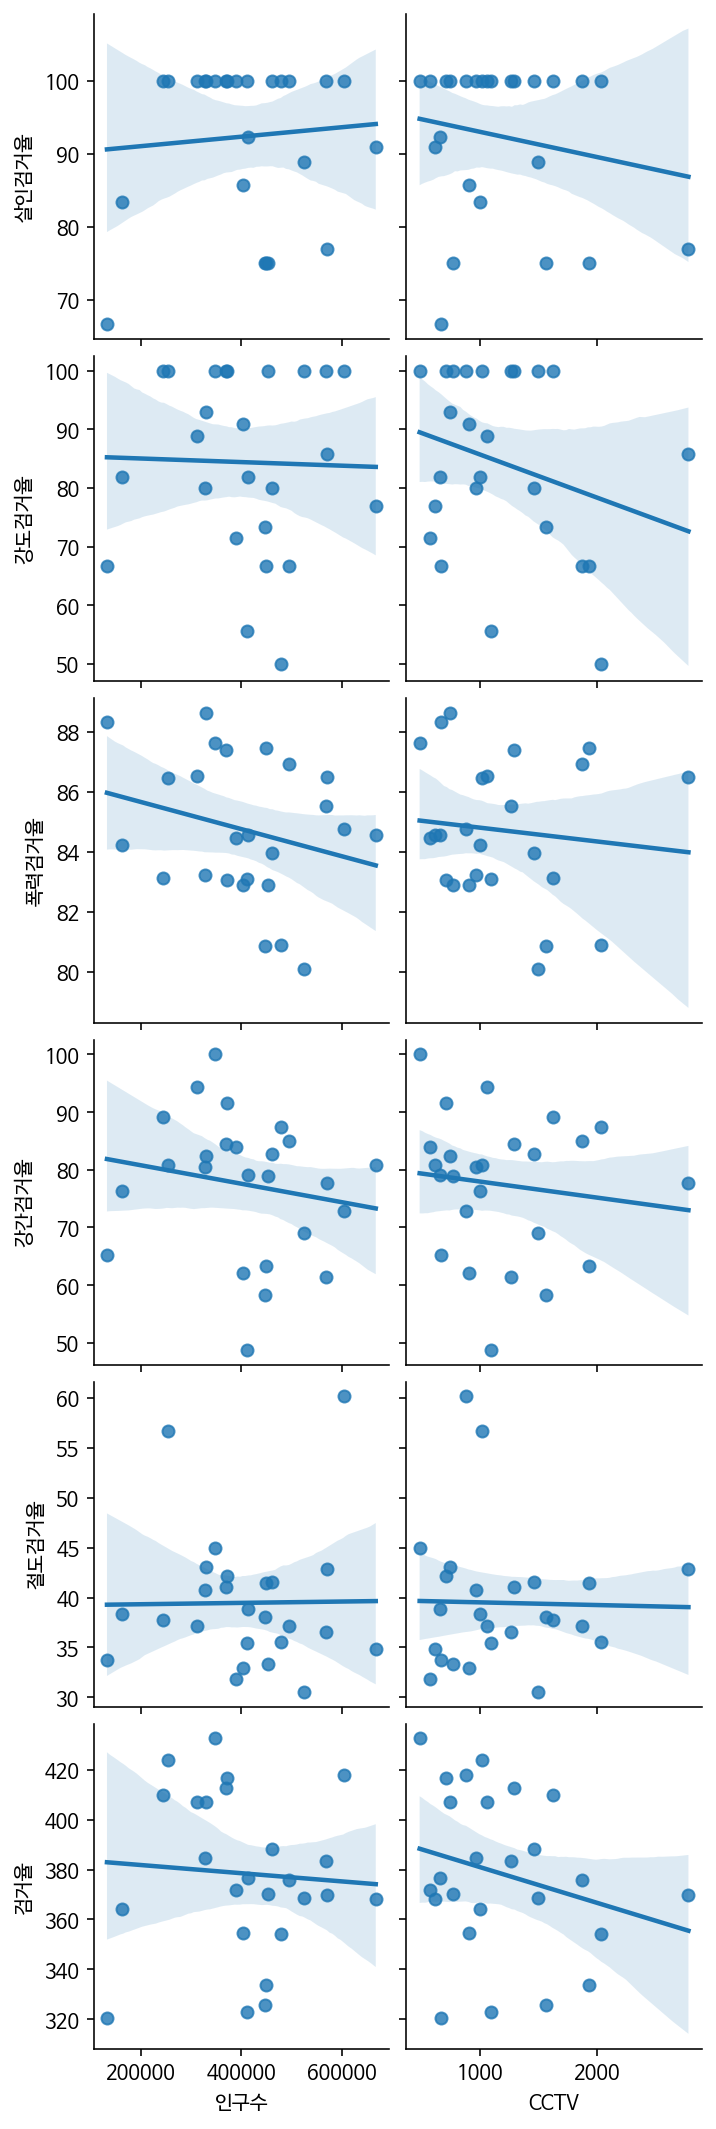

In [59]:
sns.pairplot(
    data=crime_norm,
    x_vars=["인구수","CCTV"],
    y_vars=["살인검거율","강도검거율","폭력검거율","강간검거율","절도검거율","검거율"],
    kind = "reg"
)

plt.show()

# 검거율은 떨어지네 인구수cctv늘어날수록

## heatmap시각화

### heatmap사용해서 검거율 순으로 정렬 후 시각화

In [60]:
crime_norm[["살인검거율","강도검거율","폭력검거율","강간검거율","절도검거율","검거율"]].head()

,살인검거율,강도검거율,폭력검거율,강간검거율,절도검거율,검거율
구별,,,,,,
강남구,76.923077,85.714286,86.484594,77.728285,42.857143,369.707384
강동구,75.000000,100.000000,82.890855,78.846154,33.347422,370.084431
강북구,100.000000,92.857143,88.637222,82.352941,43.096234,406.943540
강서구,100.000000,100.000000,84.752105,72.900763,60.114504,417.767372
관악구,88.888889,100.000000,80.109157,69.062500,30.561715,368.622261


In [63]:
# 검거율 0~100으로 만들때 minmaxscale쓰면 안됨 최솟값이 0 돼서 값이그냥 0이되어버림.
# 최대값 대비비율로 구할꺼
tmp_max = crime_norm["검거율"].max()
# 검거율의 최대값을 100으로, 나머지를 비율대비로 이용
crime_norm["검거율"] = crime_norm["검거율"] / tmp_max * 100
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,85.463066
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,85.550226
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,94.070728
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,96.572809
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,85.212224


In [65]:
crime_norm_sorted = crime_norm.sort_values(by="검거율",ascending=False)
crime_norm_sorted

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.000000,100.000000,41.090358,87.401884,369496.0,1294,1.633921,95.444250
용산구,0.265130,0.529412,0.250000,0.177252,0.201287,89.175258,100.000000,100.000000,37.700706,83.121951,244203.0,1624,1.423080,94.776790
성동구,0.069164,0.235294,0.166667,0.195192,0.044691,94.444444,88.888889,100.000000,37.149969,86.538462,311244.0,1062,0.711008,94.088810
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,94.070728
성북구,0.138329,0.000000,0.250000,0.259060,0.258134,82.666667,80.000000,100.000000,41.512605,83.974649,461260.0,1464,0.905522,89.727243


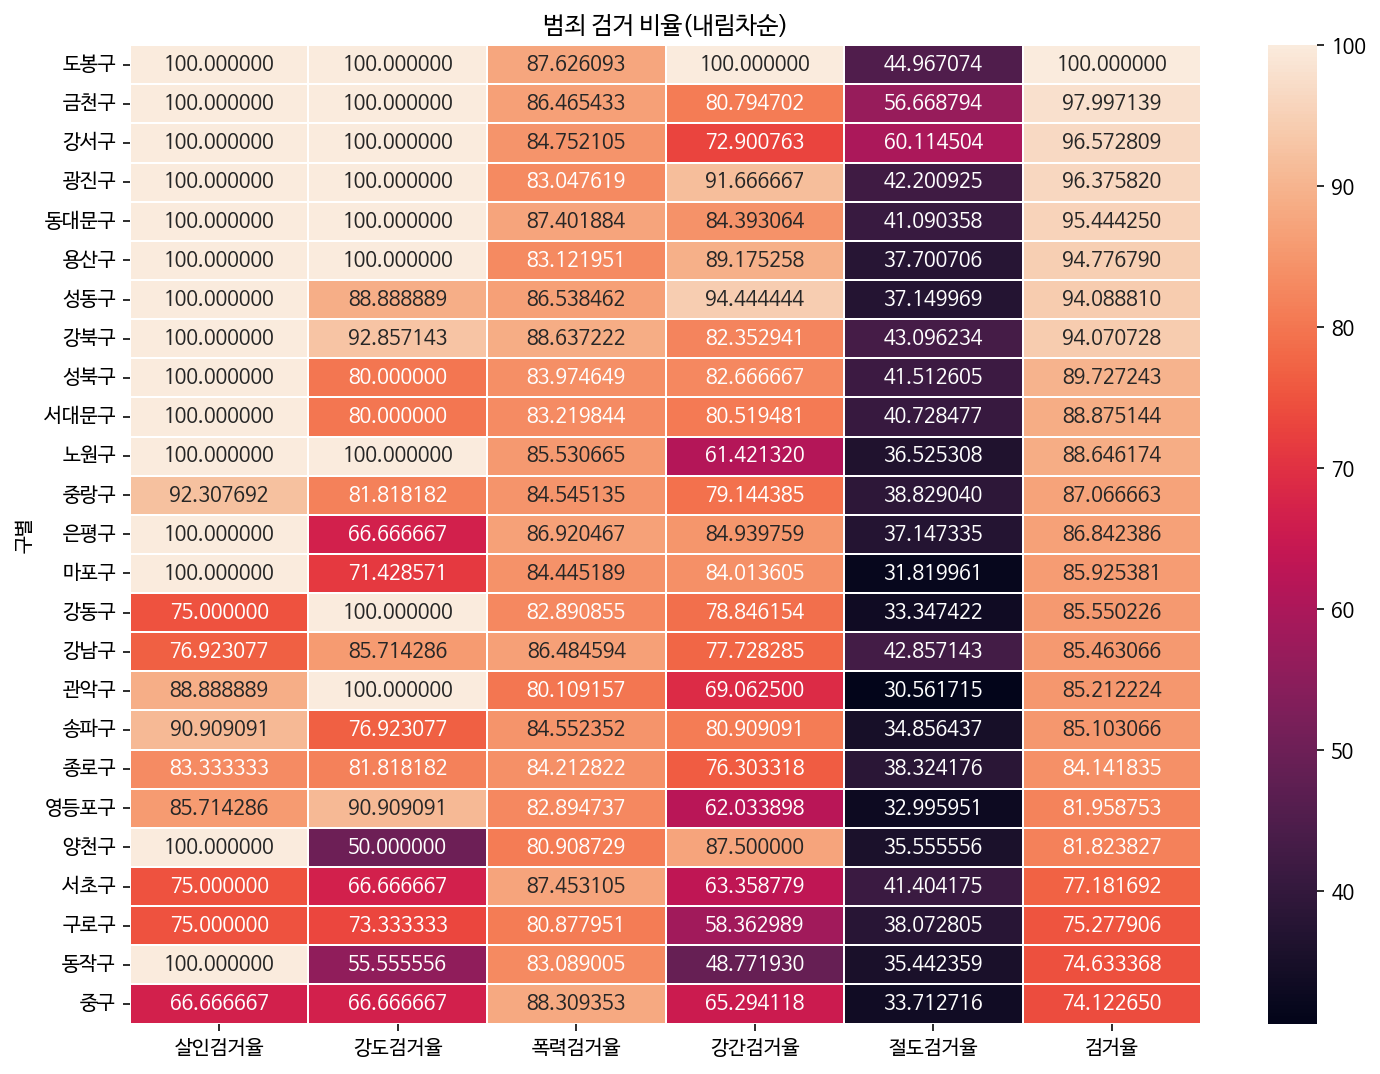

In [67]:
columns = ['살인검거율', '강도검거율', '폭력검거율', '강간검거율', '절도검거율', '검거율']

sns.heatmap(
    crime_norm_sorted[columns],
    annot=True,
    fmt = 'f', # 실수형식으로 표시해라
    linewidths=.5 # 선굵기
)

plt.title("범죄 검거 비율(내림차순)")
plt.show()

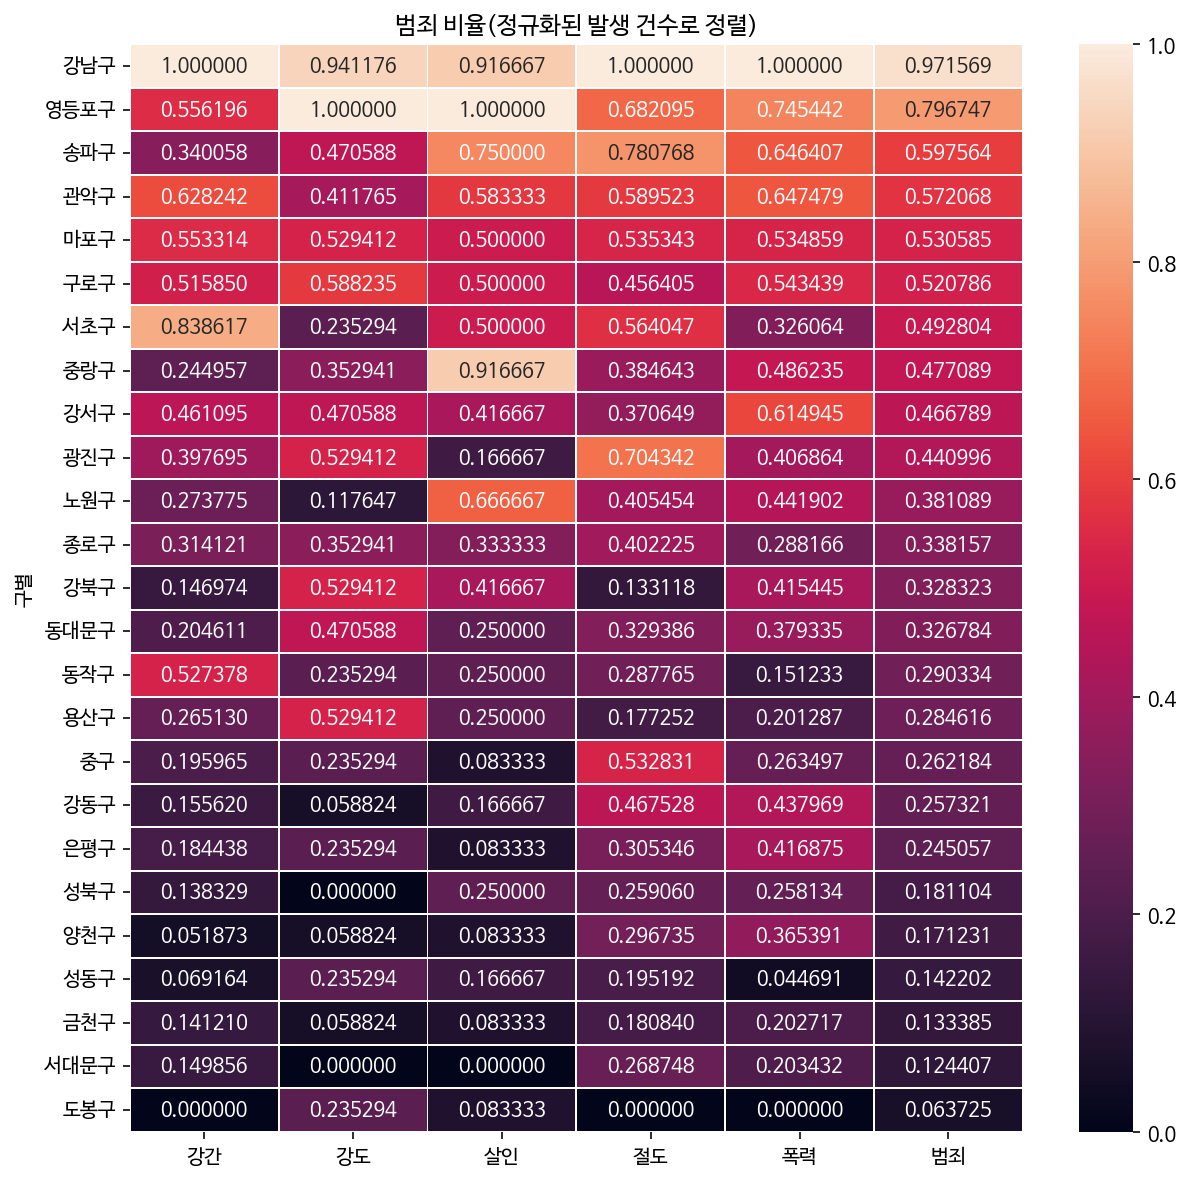

In [68]:
# 범죄도 시각화해보자
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_norm['범죄'] = crime_norm['범죄'] / 5
crime_norm_sorted = crime_norm.sort_values(by='범죄', ascending=False) # 범죄 내림차순 정렬

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_norm_sorted[target_col],
    annot=True,
    fmt='f',
    linewidths = .5
)
plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
plt.show()